In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel(r"C:\Users\pauli\Downloads\Online_Retail.xlsx")

In [3]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


customerid - jest floatem, poza tym ma dużo nulli?
description -> nulle

In [5]:
df.describe()

#quantity - duże wartości min i max - do sprawdzenia
#przedział dat - 01-12-2010 do 09-12-2011
#unit price - duzy min i max - do sprawdzenia
#customer id - zmiana float na str

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [6]:
df['CustomerID'] = df['CustomerID'].astype('Int64')
df['CustomerID'] = df['CustomerID'].astype(str)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   541909 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
df.query('Quantity == 80995 or Quantity==-80995')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446,United Kingdom


In [9]:
df['InvoiceNo'].nunique()

25900

5. Faktury [Invoice]:
    - ile mamy faktur?
    - jaki jest rozklad wartosci faktur?
    - ile roznych produktow jest na fakturze?
    - w jakiej liczbie kupowane są produkty?
    - czy da sie zidentyfikowac zwroty?

In [10]:
# jaki jest rozklad wartosci faktur?

df_summary_per_invoice = df.copy()
df_summary_per_invoice['Sales'] = df_summary_per_invoice['Quantity']*df_summary_per_invoice['UnitPrice']

In [19]:
df_summary_per_invoice = df_summary_per_invoice.groupby('InvoiceNo')['Sales'].sum()

In [20]:
df_summary_per_invoice

InvoiceNo
536365        139.12
536366         22.20
536367        278.73
536368         70.05
536369         17.85
             ...    
C581484   -168469.60
C581490       -32.53
C581499      -224.69
C581568       -54.75
C581569        -7.50
Name: Sales, Length: 25900, dtype: float64

In [37]:
df_summary_per_invoice.describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99])

count     25900.000000
mean        376.360924
std        2013.261050
min     -168469.600000
1%         -299.412500
5%          -29.404500
25%          11.775000
50%         207.535000
75%         409.085000
95%        1305.634000
99%        4106.868800
max      168469.600000
Name: Sales, dtype: float64

<Axes: xlabel='Sales'>

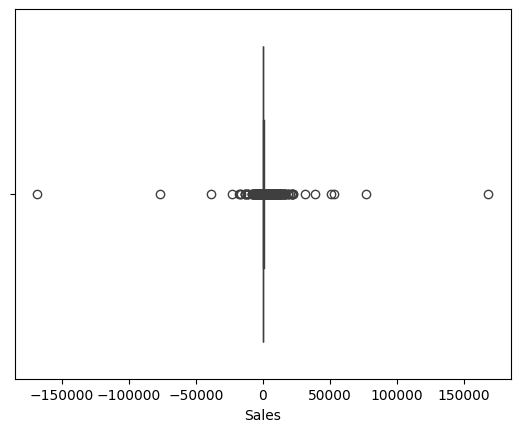

In [ ]:
sns.boxplot(x=df_summary_per_invoice)


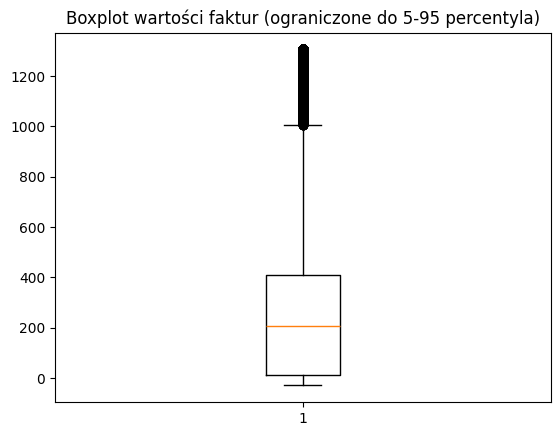

In [ ]:
#dane z bardzo duzymi outlierami, dlatego w ogole nie widac boxplotu
#ograniczenie wartosci do p5-p95

p5 = df_summary_per_invoice.quantile(0.05)
p95 = df_summary_per_invoice.quantile(0.95)

# ograniczone dane
df_clip = df_summary_per_invoice.clip(lower=p1, upper=p99)

plt.boxplot(df_clip)
plt.title("Boxplot wartości faktur (ograniczone do 5-95 percentyla)")
plt.show()